In [2]:
# import matplotlib.pyplot as plt
# from ultralytics import YOLO
# import cv2
# import google.generativeai as genai
# from PIL import Image, ImageDraw, ImageFont
# import numpy as np
# import time
# import os
from projectaria_tools.core import data_provider, calibration
import projectaria_tools.core.mps as mps
from projectaria_tools.core import data_provider
from projectaria_tools.core.stream_id import StreamId
from projectaria_tools.core.mps.utils import (
    get_gaze_vector_reprojection,
    get_nearest_eye_gaze
)
# import glob
from projectaria_tools.core.mps.utils import get_nearest_wrist_and_palm_pose
# import pandas as pd
import numpy as np
import cv2


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

data = np.load('/Users/michaelrice/Documents/GitHub/Thesis/MSc_AI_Thesis/sampledata/driving_data/cartest2/cartest2.npy', allow_pickle=True).item()
frames = data['rgb']
frames = list(frames.values())

imu = data['imu']

print(len(frames))

for i,frame in enumerate(frames):
    cv2.imwrite(f'/Volumes/MichaelSSD/obj_det_test/{i}.png', cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))

1000


In [4]:
from ultralytics import YOLO

# Load the model
model = YOLO("/Users/michaelrice/Documents/GitHub/Thesis/MSc_AI_Thesis/runs/detect/train3/weights/best.pt")

# Run inference on an image
results = model.predict("/Volumes/MichaelSSD/obj_det_test/998.png", device="mps")

# Show the result
for result in results:
    result.show()

# sample = frames[999]

# print(np.shape(frame))
# plt.figure(figsize=(15,15))  # Set figure size (width=8 inches, height=6 inches)
# plt.imshow(sample)
# plt.axis("off")  # Hide axes
# plt.show()


image 1/1 /Volumes/MichaelSSD/obj_det_test/998.png: 640x640 1 Infotainment Unit, 1 Rearview Mirror, 1 Right Wing Mirror, 1 Steering Wheel, 9.9ms
Speed: 81.9ms preprocess, 9.9ms inference, 839.3ms postprocess per image at shape (1, 3, 640, 640)


In [3]:
gaze_cpf = mps.read_eyegaze('C:/Users/athen/Desktop/Github/MastersThesis/sampledata/sample3/mps_Driving_Profile_Test_vrs/eye_gaze/general_eye_gaze.csv')
handwrist_points  = mps.hand_tracking.read_wrist_and_palm_poses('C:/Users/athen/Desktop/Github/MastersThesis/sampledata/sample3/mps_Driving_Profile_Test_vrs/hand_tracking/wrist_and_palm_poses.csv')


timestamps = np.linspace(119.521, 136.771, 346)

res = {}

for t in timestamps:
  tns = t * 1e9

  wrist_and_palm_pose = get_nearest_wrist_and_palm_pose(handwrist_points, tns)

  if wrist_and_palm_pose is not None:
    left_pose_confidence = wrist_and_palm_pose.left_hand.confidence
    left_wrist_position_device = wrist_and_palm_pose.left_hand.wrist_position_device
    left_palm_position_device = wrist_and_palm_pose.left_hand.palm_position_device
    left_wrist_normal_device = wrist_and_palm_pose.left_hand.wrist_and_palm_normal_device.wrist_normal_device

    res[t] = {
      'left_pose_confidence': left_pose_confidence,
      'left_wrist_position_device': left_wrist_position_device,
      'left_palm_position_device': left_palm_position_device,
      'left_wrist_normal_device': left_wrist_normal_device
    }





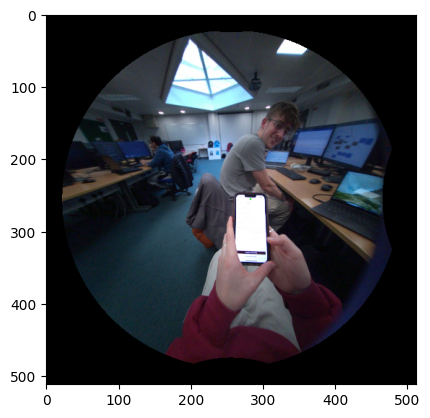

In [17]:
from projectaria_tools.core.calibration import (
    device_calibration_from_json_string,
    distort_by_calibration,
    get_linear_camera_calibration,
)
import matplotlib.pyplot as plt
import numpy as np
import cv2
from projectaria_tools.core.image import InterpolationMethod

# Load image and calibration

path = 'C:/Users/athen/Desktop/Github/MastersThesis/sampledata/imagetesting/facetest.jpg'
samp = cv2.imread(path)

#float32


with open('C:/Users/athen/Desktop/Github/MastersThesis/MSc_AI_Thesis/Coding/other/calibration.json') as f:
    sc = f.read()


sensors_calib = device_calibration_from_json_string(sc)
rgb_calib = sensors_calib.get_camera_calib("camera-rgb")
dst_calib = get_linear_camera_calibration(512, 512, 150, "camera-rgb")

# for img in rgb_images:

undistorted_rgb_image = distort_by_calibration(
                samp, dst_calib, rgb_calib,
                InterpolationMethod.BILINEAR
            )

plt.imshow(cv2.cvtColor(undistorted_rgb_image, cv2.COLOR_BGR2RGB))
plt.show()
        


In [15]:
import os 

files = os.listdir('C:/Users/athen/Desktop/Github/MastersThesis/sampledata/sample3/frames')

files_et = [f for f in files if '211' in f]

for f in files_et:
    image = cv2.imread('C:/Users/athen/Desktop/Github/MastersThesis/sampledata/sample3/frames/' + f)
    #save images
    cv2.imwrite('C:/Users/athen/Desktop/Github/MastersThesis/sampledata/sample3/etframes/' + f, image)


In [2]:
import cv2
import numpy as np 

video_path = "C:/Users/athen/Downloads/kinect_color/kinect_color/vp3/run2_2018-05-29-16-03-37.kinect_color.mp4"

cap = cv2.VideoCapture(video_path)
fourcc = int(cap.get(cv2.CAP_PROP_FOURCC))
codec = "".join([chr((fourcc >> 8 * i) & 0xFF) for i in range(4)])

print(f"Codec: {codec}")

while cap.isOpened():
    ret, frame = cap.read()
    print(frame.size)

    break

Codec: h264
1555200


In [15]:
data = np.load('C:/Users/athen/Desktop/Github/MastersThesis/sampledata/testfolder/f1/f1.npy', allow_pickle=True).item()['rgb']



In [16]:
frame = np.array(list(data.values())[0])

print(type(frame))
print(frame.size)

<class 'numpy.ndarray'>
786432


In [4]:
import cv2
import matplotlib.pyplot as plt
import sys
import os
sys.path.append('/Users/michaelrice/Documents/GitHub/Thesis/MSc_AI_Thesis')
from notebooks_and_scripts.vrs_extractor import VRSDataExtractor

sample_img = cv2.imread('/Users/michaelrice/Documents/GitHub/Thesis/MSc_AI_Thesis/sampledata/imagetesting/fullres_lp_success.jpeg')
sample_img = cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB)

vde = VRSDataExtractor('/Users/michaelrice/Documents/GitHub/Thesis/MSc_AI_Thesis/sampledata/driving_data/cartest2/cartest2.vrs')







[ProgressLogger][INFO]: 2025-04-07 17:29:08: Opening /Users/michaelrice/Documents/GitHub/Thesis/MSc_AI_Thesis/sampledata/driving_data/cartest2/cartest2.vrs...
[VRSIndexRecord][WARNING]: 58 record(s) not sorted properly. Sorting index.
[MultiRecordFileReader][DEBUG]: Opened file '/Users/michaelrice/Documents/GitHub/Thesis/MSc_AI_Thesis/sampledata/driving_data/cartest2/cartest2.vrs' and assigned to reader #0
[VrsDataProvider][INFO]: streamId 211-1/camera-et activated
[VrsDataProvider][INFO]: streamId 214-1/camera-rgb activated
[VrsDataProvider][INFO]: streamId 231-1/mic activated
[VrsDataProvider][INFO]: streamId 281-1/gps activated
[VrsDataProvider][INFO]: streamId 282-1/wps activated
[VrsDataProvider][INFO]: streamId 283-1/bluetooth activated
[VrsDataProvider][WARNING]: Unsupported TimeSync mode: APP, ignoring.
[VrsDataProvider][INFO]: Fail to activate streamId 286-1
[VrsDataProvider][INFO]: streamId 1201-1/camera-slam-left activated
[VrsDataProvider][INFO]: streamId 1201-2/camera-slam

In [1]:
import numpy as np 

data = np.load('/Users/michaelrice/Documents/GitHub/Thesis/MSc_AI_Thesis/sampledata/driving_data/cartest2/cartest2.npy', allow_pickle=True).item()

frames = data['rgb']
frames = list(frames.values())




(1408, 1408, 3)


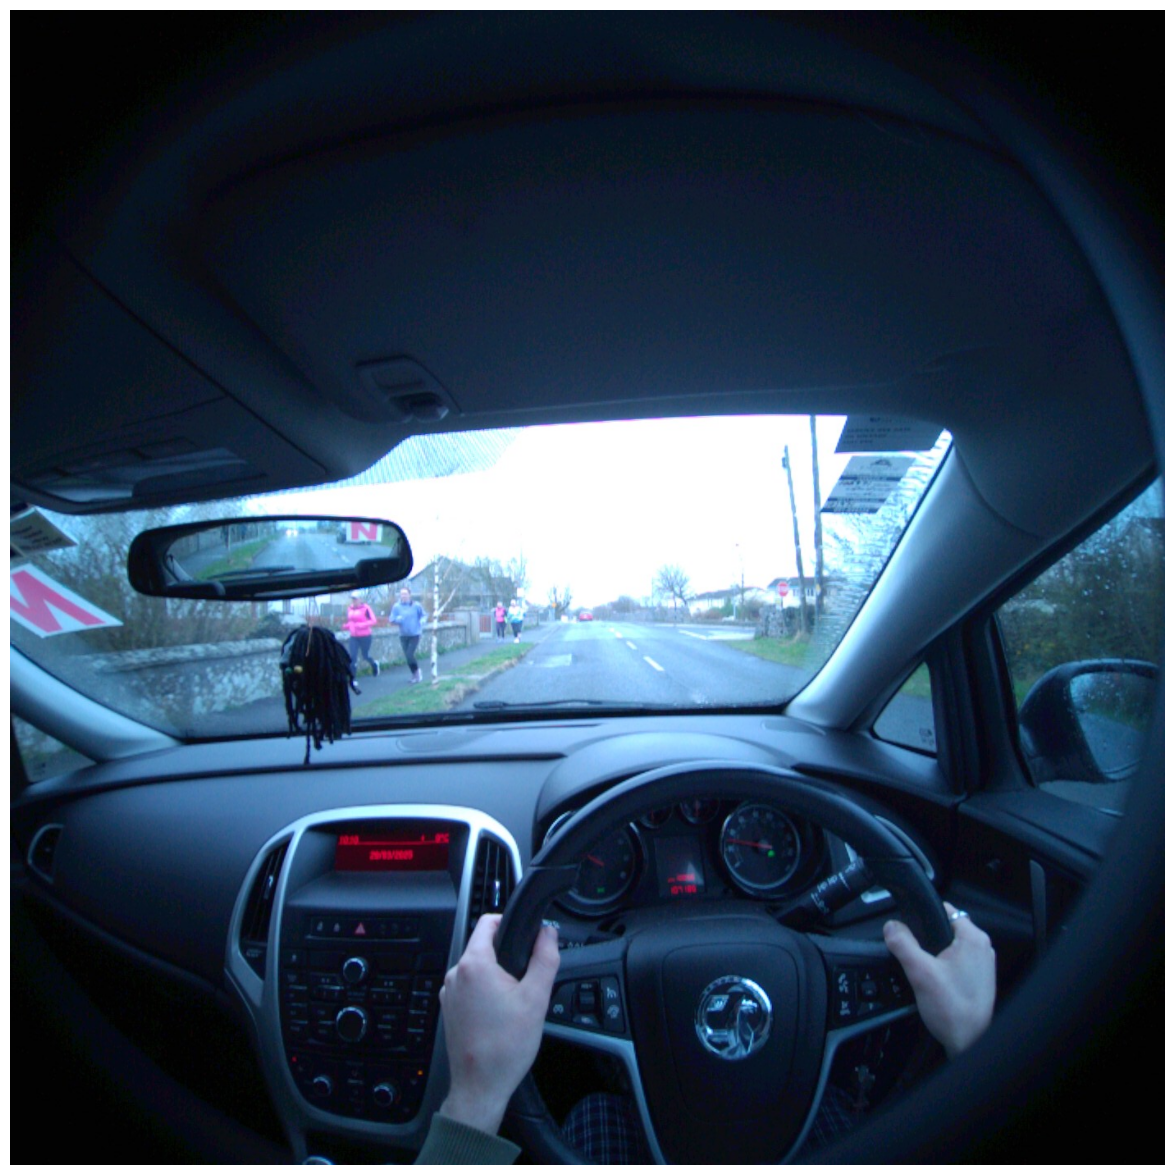

In [7]:
import matplotlib.pyplot as plt
sample = frames[233]

print(np.shape(sample))

plt.figure(figsize=(15,15))  # Set figure size (width=8 inches, height=6 inches)
plt.imshow(sample)
plt.axis("off")  # Hide axes
plt.show()

In [8]:
cropped_images = vde.person_detection(sample)
print(len(cropped_images))


0: 640x640 3 persons, 1 car, 1 horse, 1 cell phone, 46.3ms
Speed: 1.7ms preprocess, 46.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)
3


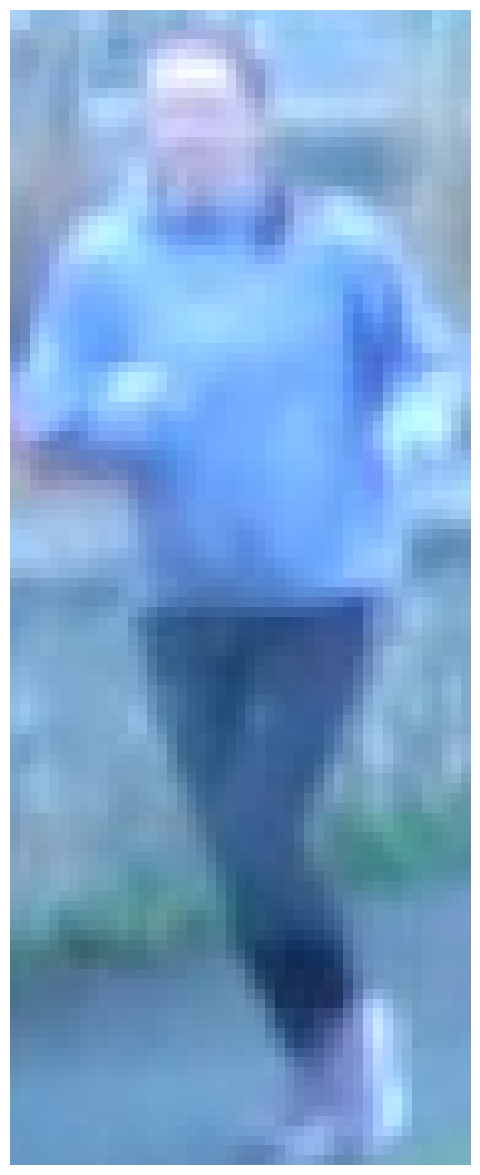

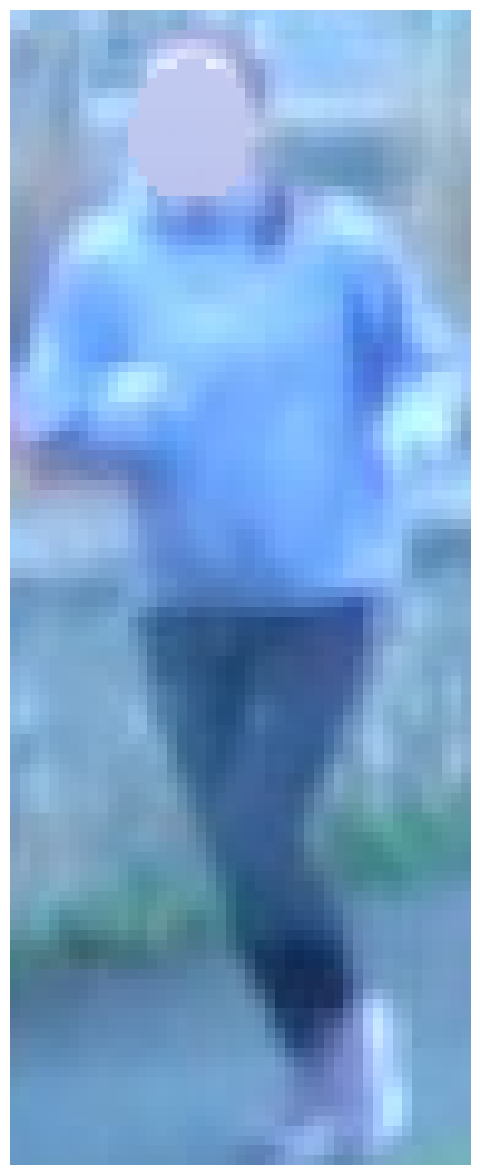

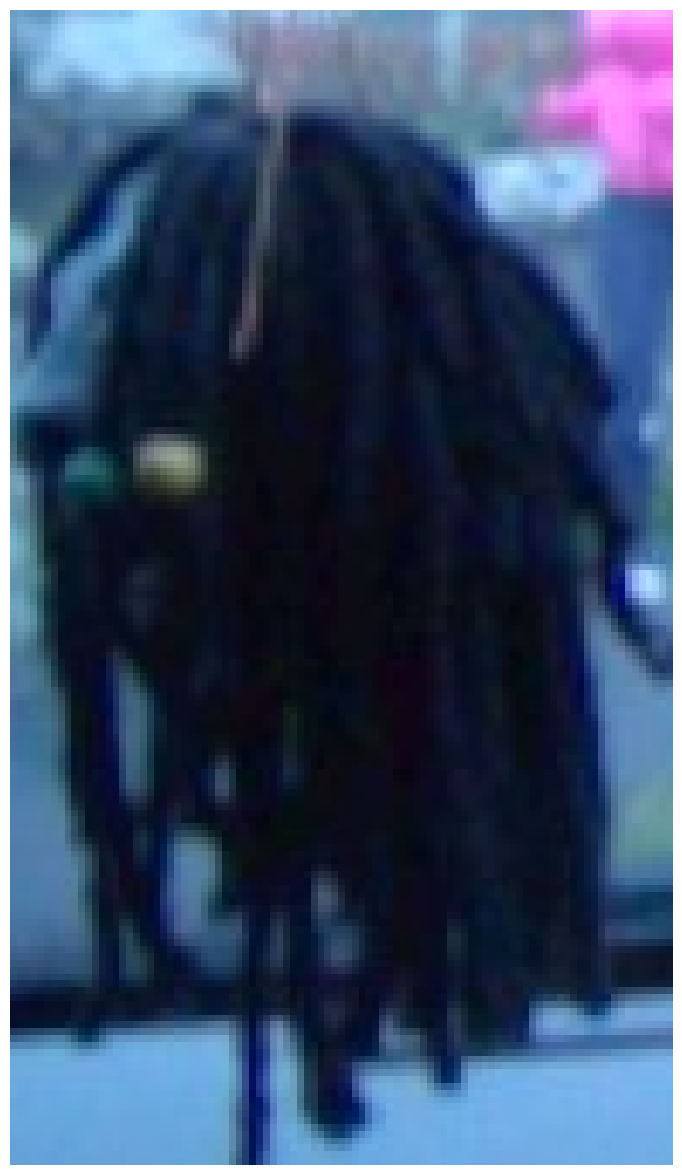

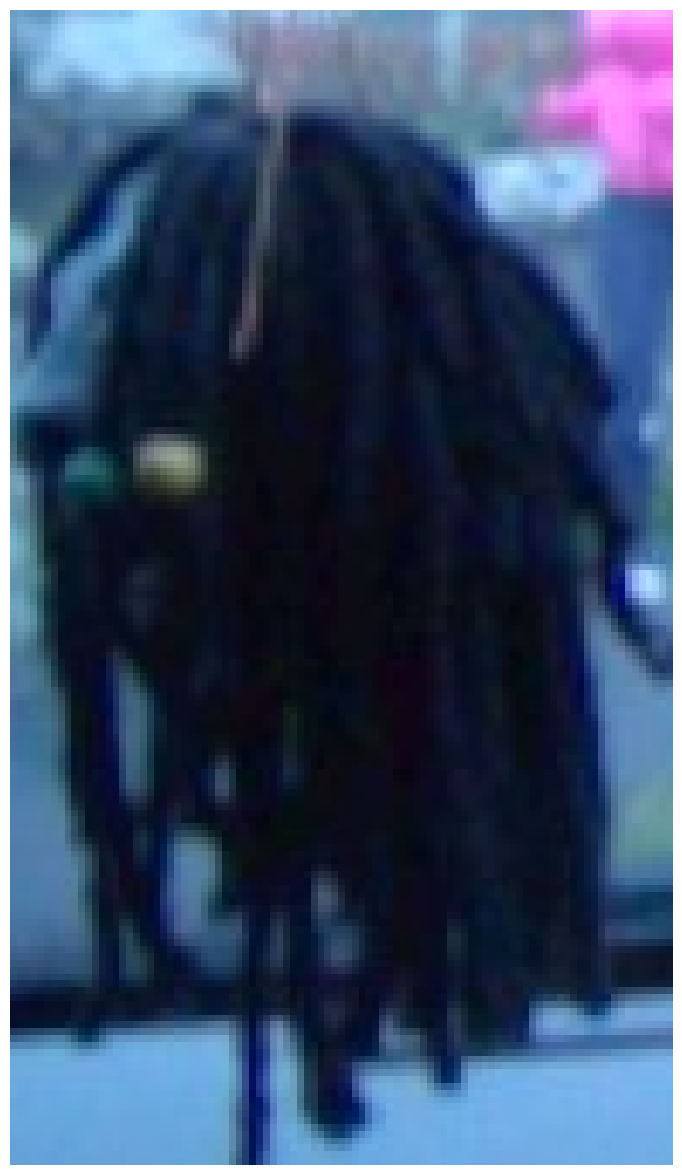

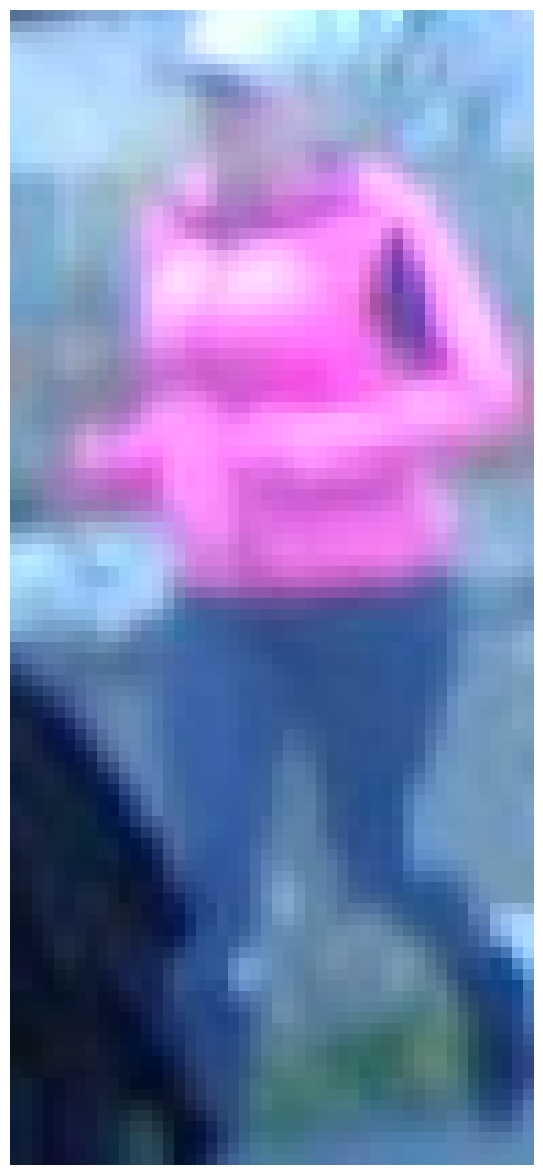

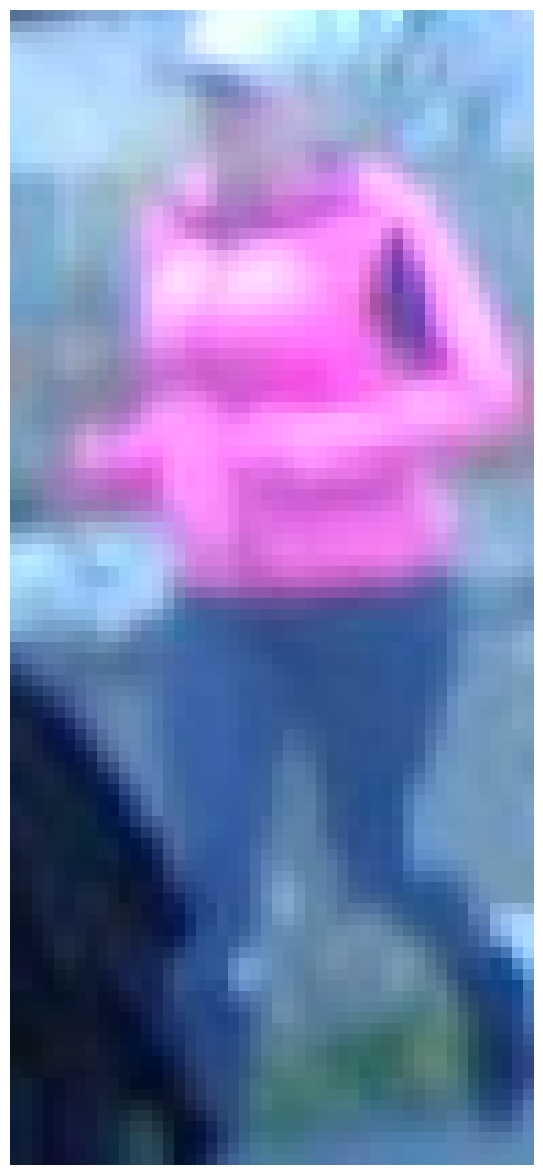

In [13]:
from OtherModelScripts import ego_blur 
import torch 

egoblur_face_path = '/Users/michaelrice/Documents/GitHub/Thesis/MSc_AI_Thesis/models/ego_blur_face.jit'
face_detector = torch.jit.load(egoblur_face_path, map_location="cpu")
license_plate_path = '/Users/michaelrice/Documents/GitHub/Thesis/MSc_AI_Thesis/models/ego_blur_lp.jit'
lp_detector = torch.jit.load(license_plate_path, map_location="cpu")

for img in cropped_images:

    plt.figure(figsize=(15,15))  # Set figure size (width=8 inches, height=6 inches)
    plt.imshow(img)
    plt.axis("off")  # Hide axes
    plt.show()

    
    bgr_frame = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    image = bgr_frame.copy()

    image_tensor = ego_blur.get_image_tensor(image)
    image_tensor_copy = image_tensor.clone()

    face_model_score_threshold = 0.1
    lp_model_score_threshold = 0.9
    nms_iou_threshold = 0.4
    scale_factor_detections = 1

    label = 'face'

    output_image = ego_blur.visualize_image(
        image,
        image_tensor,
        image_tensor_copy,
        face_detector,
        lp_detector,
        face_model_score_threshold,
        lp_model_score_threshold,
        nms_iou_threshold,
        scale_factor_detections,
        label
    )

    output_image = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(15,15))  # Set figure size (width=8 inches, height=6 inches)
    plt.imshow(output_image)
    plt.axis("off")  # Hide axes
    plt.show()


In [1]:
!python --version


Python 3.11.12


[ProgressLogger][INFO]: 2025-05-13 11:29:10: Opening /Users/michaelrice/Documents/GitHub/Thesis/MSc_AI_Thesis/sampledata/yolo/vrs/DadCarYOLO.vrs...
[MultiRecordFileReader][DEBUG]: Opened file '/Users/michaelrice/Documents/GitHub/Thesis/MSc_AI_Thesis/sampledata/yolo/vrs/DadCarYOLO.vrs' and assigned to reader #0
[VrsDataProvider][INFO]: streamId 214-1/camera-rgb activated
[VrsDataProvider][WARNING]: Unsupported TimeSync mode: APP, ignoring.
[VrsDataProvider][INFO]: Fail to activate streamId 286-1
[VrsDataProvider][WARNING]: Aria recording is already color corrected. No need to set this flag.


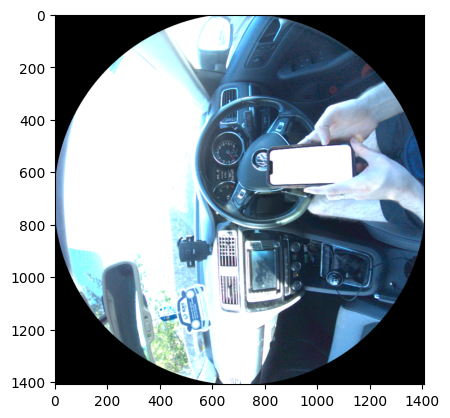

In [22]:
from projectaria_tools.core import data_provider
from projectaria_tools.core import data_provider, calibration

provider = data_provider.create_vrs_data_provider('/Users/michaelrice/Documents/GitHub/Thesis/MSc_AI_Thesis/sampledata/yolo/vrs/DadCarYOLO.vrs')
camera_label = 'camera-rgb'
stream_id = provider.get_stream_id_from_label(camera_label)

calib = provider.get_device_calibration().get_camera_calib(camera_label)
pinhole = calibration.get_linear_camera_calibration(640, 640, 300)

provider.set_color_correction(True)
provider.set_devignetting(True)
provider.set_devignetting_mask_folder_path('/Users/michaelrice/devignetting_masks')
raw_image = provider.get_image_data_by_index(stream_id, 0)[0].to_numpy_array()

undistorted_image = calibration.distort_by_calibration(raw_image, pinhole, calib)
plt.imshow(undistorted_image)
plt.show()
plt.imshow(raw_image)
plt.show()

# devignetted_image_array = provider.get_image_data_by_index(stream_id, 0)[0].to_numpy_array()


Loaded #EyeGazes: 173


[ProgressLogger][INFO]: 2025-05-13 16:45:10: Opening /Users/michaelrice/Documents/GitHub/Thesis/MSc_AI_Thesis/sampledata/sample3/Driving_Profile_Test.vrs...
[VRSIndexRecord][WARNING]: 2 record(s) not sorted properly. Sorting index.
[MultiRecordFileReader][DEBUG]: Opened file '/Users/michaelrice/Documents/GitHub/Thesis/MSc_AI_Thesis/sampledata/sample3/Driving_Profile_Test.vrs' and assigned to reader #0
[VrsDataProvider][INFO]: streamId 211-1/camera-et activated
[VrsDataProvider][INFO]: streamId 214-1/camera-rgb activated
[VrsDataProvider][INFO]: streamId 281-1/gps activated
[VrsDataProvider][INFO]: streamId 282-1/wps activated
[VrsDataProvider][INFO]: streamId 283-1/bluetooth activated
[VrsDataProvider][WARNING]: Unsupported TimeSync mode: APP, ignoring.
[VrsDataProvider][INFO]: Fail to activate streamId 286-1
[VrsDataProvider][INFO]: streamId 1201-1/camera-slam-left activated
[VrsDataProvider][INFO]: streamId 1201-2/camera-slam-right activated
[VrsDataProvider][INFO]: streamId 1202-1/i

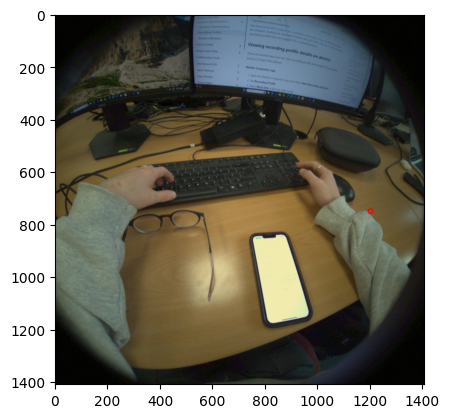

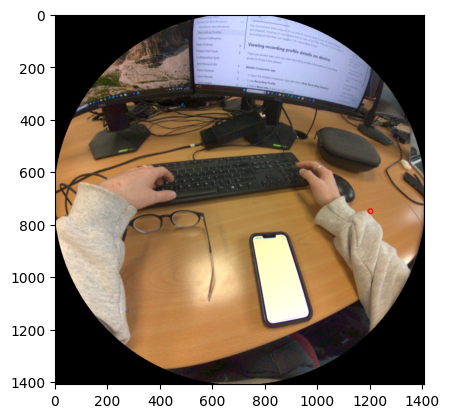

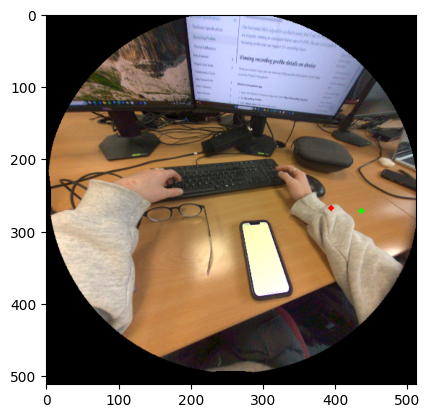

In [134]:
from projectaria_tools.core import data_provider
from projectaria_tools.core import data_provider, calibration
import projectaria_tools.core.mps as mps
from projectaria_tools.core.mps.utils import (
    get_nearest_wrist_and_palm_pose,
    get_gaze_vector_reprojection,
    get_nearest_eye_gaze,
    get_nearest_pose,
    filter_points_from_confidence
)
from projectaria_tools.core.sensor_data import TimeDomain, TimeQueryOptions
from projectaria_tools.core.stream_id import StreamId
import cv2
import numpy as np



provider = data_provider.create_vrs_data_provider('/Users/michaelrice/Documents/GitHub/Thesis/MSc_AI_Thesis/sampledata/sample3/Driving_Profile_Test.vrs')
camera_label = 'camera-rgb'
stream_id = provider.get_stream_id_from_label(camera_label)
rgb_ts = provider.get_timestamps_ns(StreamId("214-1"), TimeDomain.DEVICE_TIME)
et_ts = provider.get_timestamps_ns(StreamId("211-1"), TimeDomain.DEVICE_TIME)

gaze_cpf = mps.read_eyegaze('/Users/michaelrice/Documents/GitHub/Thesis/MSc_AI_Thesis/sampledata/sample3/mps_Driving_Profile_Test_vrs/eye_gaze/general_eye_gaze.csv')

sample_rgb_ts = rgb_ts[0]
sample_et_ts = et_ts[0]

gp = get_nearest_eye_gaze(gaze_cpf, sample_et_ts)
rgb_stream_label = provider.get_label_from_stream_id(StreamId("214-1"))
device_calibration = provider.get_device_calibration()
rgb_camera_calibration = device_calibration.get_camera_calib(rgb_stream_label)

gaze_projection = get_gaze_vector_reprojection(
        gp,
        rgb_stream_label,
        device_calibration,
        rgb_camera_calibration,
        depth_m=gp.depth
    )

gaze_projection = [1200,750]

provider.set_color_correction(True)
provider.set_devignetting(False)
provider.set_devignetting_mask_folder_path('/Users/michaelrice/devignetting_masks')
raw_image = provider.get_image_data_by_index(stream_id, 0)[0].to_numpy_array()
rotated = cv2.rotate(raw_image, cv2.ROTATE_90_CLOCKWISE)
np_frame = np.array(rotated)
np_frame = cv2.circle(np_frame, (int(gaze_projection[0]), int(gaze_projection[1])), 9, (255, 0, 0), 3)


distortion_params = device_calibration.get_camera_calib(camera_label)

plt.imshow(np_frame)
plt.show()

provider.set_devignetting(True)
dv_image = provider.get_image_data_by_index(stream_id, 0)[0].to_numpy_array()
rotated2 = cv2.rotate(dv_image, cv2.ROTATE_90_CLOCKWISE)
np_frame2 = np.array(rotated2)
np_frame2 = cv2.circle(np_frame2, (int(gaze_projection[0]), int(gaze_projection[1])), 9, (255, 0, 0), 3)


plt.imshow(np_frame2)
plt.show()

corrected = [864.1076,663.5848]
non_corrected = [gaze_projection[0], gaze_projection[1]]

def undistort_point(point_distorted_px, src_calib, dst_calib):
    ray = src_calib.unproject(point_distorted_px)
    point_undistorted = dst_calib.project(ray)
    return point_undistorted

reproj_gaze = undistort_point(
    gaze_projection,
    src_calib=calibration.get_linear_camera_calibration(1408, 1408, 608.611),
    dst_calib=calibration.get_linear_camera_calibration(512, 512, 170)
)

calib = provider.get_device_calibration().get_camera_calib(camera_label)
pinhole = calibration.get_linear_camera_calibration(512, 512, 170)
undistorted_image = calibration.distort_by_calibration(dv_image, pinhole, calib)
rotated3 = cv2.rotate(undistorted_image, cv2.ROTATE_90_CLOCKWISE)
np_frame3 = np.array(rotated3)
np_frame3 = cv2.circle(np_frame3, (int(reproj_gaze[0]), int(reproj_gaze[1])), 2, (255, 0, 0), 3)
np_frame3 = cv2.circle(np_frame3, (int(gaze_projection[0]*(512/1408)), int(gaze_projection[1]*(512/1408))), 2, (0, 255, 0), 3)

plt.imshow(np_frame3)
plt.show()

# devignetted_image_array = provider.get_image_data_by_index(stream_id, 0)[0].to_numpy_array()

In [124]:
import numpy as np
from typing import Tuple

def undistort_gaze_points(
    gaze_points: np.ndarray,
    fx: float,
    fy: float,
    cx: float,
    cy: float,
    p: Tuple[float, float],
    s: Tuple[float, float, float, float],
    max_iter: int = 10,
    tol: float = 1e-6
) -> Tuple[np.ndarray, np.ndarray]:
    """
    Vectorized function to undistort gaze points from distorted pixel space to normalized camera space.

    Args:
        gaze_points (np.ndarray): Nx2 array of distorted pixel coordinates (u, v).
        fx (float): Focal length in x.
        fy (float): Focal length in y.
        cx (float): Principal point x.
        cy (float): Principal point y.
        p (tuple): Tangential distortion coefficients (p0, p1).
        s (tuple): Thin prism distortion coefficients (s0, s1, s2, s3).
        max_iter (int): Maximum number of Newton iterations.
        tol (float): Convergence tolerance.

    Returns:
        Tuple[np.ndarray, np.ndarray]: Tuple of undistorted normalized points (Nx2) and 3D unit vectors (Nx3).
    """
    def compute_residual_vec(u_r, v_r, x_d, y_d):
        r2 = u_r**2 + v_r**2
        r = np.sqrt(r2)
        r4 = r2**2

        tx = p[0] * (2 * u_r**2 + r2) + 2 * p[1] * u_r * v_r
        ty = p[1] * (2 * v_r**2 + r2) + 2 * p[0] * u_r * v_r

        tpx = s[0] * r2 + s[1] * r4
        tpy = s[2] * r2 + s[3] * r4

        fx = u_r + tx + tpx - x_d
        fy = v_r + ty + tpy - y_d
        return fx, fy

    x_d = (gaze_points[:, 0] - cx) / fx
    y_d = (gaze_points[:, 1] - cy) / fy

    u_r = np.copy(x_d)
    v_r = np.copy(y_d)

    for _ in range(max_iter):
        fx_res, fy_res = compute_residual_vec(u_r, v_r, x_d, y_d)

        delta = 1e-5
        fxp, fyp = compute_residual_vec(u_r + delta, v_r, x_d, y_d)
        fxm, fym = compute_residual_vec(u_r - delta, v_r, x_d, y_d)
        Ju = np.stack([(fxp - fxm) / (2 * delta), (fyp - fym) / (2 * delta)], axis=1)

        fxp, fyp = compute_residual_vec(u_r, v_r + delta, x_d, y_d)
        fxm, fym = compute_residual_vec(u_r, v_r - delta, x_d, y_d)
        Jv = np.stack([(fxp - fxm) / (2 * delta), (fyp - fym) / (2 * delta)], axis=1)

        det = Ju[:, 0] * Jv[:, 1] - Ju[:, 1] * Jv[:, 0]
        valid = det != 0

        delta_ur = np.zeros_like(u_r)
        delta_vr = np.zeros_like(v_r)

        if np.any(valid):
            inv_det = 1.0 / det[valid]
            delta_ur[valid] = inv_det * (Jv[valid, 1] * (-fx_res[valid]) - Jv[valid, 0] * (-fy_res[valid]))
            delta_vr[valid] = inv_det * (-Ju[valid, 1] * (-fx_res[valid]) + Ju[valid, 0] * (-fy_res[valid]))

        u_r += delta_ur
        v_r += delta_vr

        if np.max(np.abs(delta_ur) + np.abs(delta_vr)) < tol:
            break

    undistorted_points = np.stack([u_r, v_r], axis=1)
    unit_vectors = np.stack([u_r, v_r, np.ones_like(u_r)], axis=1)
    unit_vectors /= np.linalg.norm(unit_vectors, axis=1, keepdims=True)

    return undistorted_points, unit_vectors

def undistort_point(point_distorted_px, src_calib, dst_calib):
    ray = src_calib.unproject(point_distorted_px)
    point_undistorted = dst_calib.project(ray)
    return point_undistorted


In [127]:
gaze_points = np.array([
    [899.675,598.2664]
])

undistorted_new = undistort_point(
    gaze_points[0],
    src_calib=calibration.get_linear_camera_calibration(1408, 1408, 608.611),
    dst_calib=calibration.get_linear_camera_calibration(512, 512, 170)
)
print("Undistorted New:\n", undistorted_new)

undistorted, unit_vectors = undistort_gaze_points(
    gaze_points=gaze_points,
    fx=608.611,
    fy=608.611,
    cx=724.24,
    cy=710.145,
    p=(0.393008, -0.412),
    s=(-0.0450934, 1.4318, -1.89079, 0.696202)
)

def normalized_to_pixel_coords(normalized_points: np.ndarray, fx: float, fy: float, cx: float, cy: float) -> np.ndarray:
    """
    Converts undistorted normalized points to pixel coordinates.
    
    Args:
        normalized_points (np.ndarray): Nx2 array of undistorted (x, y) in normalized camera space.
        fx, fy (float): Focal lengths.
        cx, cy (float): Principal point.

    Returns:
        np.ndarray: Nx2 array of ideal pixel coordinates (u, v).
    """
    u = fx * normalized_points[:, 0] + cx
    v = fy * normalized_points[:, 1] + cy
    return np.stack([u, v], axis=1)


print("Undistorted Points:\n", undistorted)
pixel_coords = normalized_to_pixel_coords(undistorted, fx=608.611, fy=608.611, cx=724.24, cy=710.145)
print("Pixel Coordinates:\n", pixel_coords)




Undistorted New:
 [310.2965 226.1057]
Undistorted Points:
 [[ 0.219  -0.0559]]
Pixel Coordinates:
 [[857.5147 676.154 ]]


In [116]:
import numpy as np

def crop_largest_square_inside_circle(image):
    """
    Crops the largest square from a circular image centered in a square image.

    Args:
        image (H x W): square image with circle mask and 0s as border

    Returns:
        Cropped image (side x side)
    """
    assert image.shape[0] == image.shape[1], "Image must be square"
    size = image.shape[0]
    
    # Compute side of largest inscribed square
    side = int(size / np.sqrt(2))
    
    # Compute starting point to crop centered
    offset = (size - side) // 2
    return image[offset:offset+side, offset:offset+side]


res = crop_largest_square_inside_circle(np_frame2)
plt.imshow(res)
plt.show()
plt.imshow(np_frame2)
plt.show()